# KNN手写识别数据集分类

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [3]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [4]:
X = digits.data#特征矩阵
X.reshape(X.shape)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
y = digits.target
y.reshape(y.shape)

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
digits.target_names#The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [8]:
X[555]

array([ 0.,  0.,  2., 10., 14., 10.,  0.,  0.,  0.,  1., 15.,  9.,  9.,
       16.,  1.,  0.,  0.,  7.,  9.,  0.,  9., 12.,  0.,  0.,  0.,  7.,
        7.,  3., 15., 15.,  0.,  0.,  0.,  2., 15., 15.,  7., 16.,  1.,
        0.,  0.,  0.,  1.,  2.,  0.,  9.,  4.,  0.,  0.,  0.,  5., 13.,
        4.,  8.,  9.,  0.,  0.,  0.,  1., 10., 15., 16.,  6.,  0.])

In [9]:
plt_digit = X[555]
y[555]

9

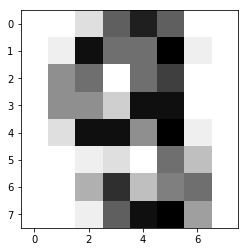

In [10]:
show_dgit = plt_digit.reshape(8,8)
plt.imshow(show_dgit,cmap = mpl.cm.binary)
plt.show()

### knn


In [11]:
from ML.model_selection import train_test_split
from ML.KNNclassifier import KNNclassifier
X_train,y_train,X_test,y_test = train_test_split(X,y,test_ratio=0.2,seed=100)
knn = KNNclassifier(k=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)#将accuracy封装了
label_predict = knn.predict(X_test)

### 封装分类准确度

```python
import numpy as np
def accuracy_score(y_true,y_predic):
    assert y_true.shape[0] == y_predic.shape[0],"the lines of y_true & y_predic must be equal
    return sum(y_predict == y_true) / len(y_true)
```

In [12]:
from ML.metrics import accuracy_score
accuracy_score(y_test,label_predict)

0.9944289693593314

## sklearn 的处理过程

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)

from sklearn.neighbors import KNeighborsClassifier#加载算法 

KNN_classifier = KNeighborsClassifier(n_neighbors=3)#创建一个实例，n_neighbors =K

KNN_classifier.fit(X_train,y_train)

KNN_classifier.score(X_test,y_test)

0.9888888888888889